<a href="https://colab.research.google.com/github/Praveen76/DeepLearning/blob/main/CNN_model_Implementation_on_CIFAR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step1. Import Libraries & Dataset

In [2]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00


In [3]:



import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plots
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import io
import os
import random
from google.colab import files
from PIL import Image
import albumentations as AV
import tensorflow_datasets as tfds
from datasets import load_dataset

import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Resizing, Rescaling
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers  import L2, L1
from tensorboard.plugins.hparams import api as hp
from google.colab import drive


In [4]:
#Load Dataset

In [6]:
dataset,dataset_info = tfds.load('cifar10', with_info=True,
                                  as_supervised=True,
                                  shuffle_files = True,
                                  split=['train[:7%]'],
                                  )


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteXRQM95/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteXRQM95/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [7]:
print(dataset[0].take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [9]:
for data in dataset[0].take(1):
  print(data)


# for i in d.take(1):
#   print(i)

(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212, 177, 147

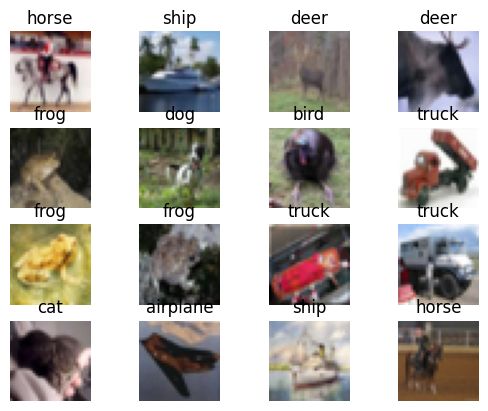

In [10]:
#Data Visualization

for i, (image, label) in enumerate(dataset[0].take(16)):
  ax = plt.subplot(4, 4, i + 1)

  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
# Step2. Split data into Train, Val & Test set

In [11]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE=len(dataset)
  train_dataset=dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset= val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset=val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset,val_dataset,test_dataset

In [12]:
TRAIN_RATIO=0.6
VAL_RATIO=0.1
TEST_RATIO=0.2

# dataset=tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset  = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
# print(list(train_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

In [13]:
original_image, label = next(iter(train_dataset))
# original_image, label


In [14]:
#Step3. Dataset Visualization

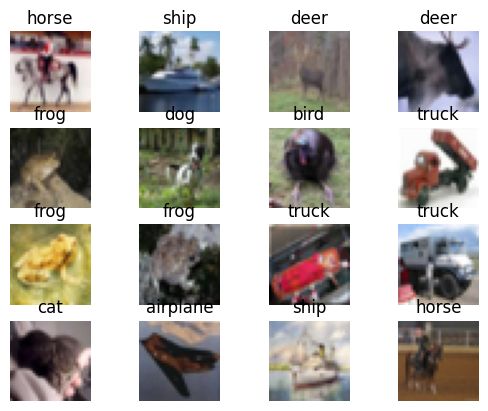

In [15]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax= plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [16]:
#data Preprocessing


In [17]:
#tf.keras.layer resizing & rescaling
IM_SIZE=224
resize_rescale_layers= tf.keras.Sequential([
    Resizing(IM_SIZE,IM_SIZE),
    Rescaling(1.0/255),
])

In [18]:
#Rotate image by 90 degree
class RotNinety(Layer):
  def __init__(self):
    super().__init__()

  def call(self, image):
    return tf.image.rot90(image)


In [19]:
###tf.keras.layer augment

augment_layers= tf.keras.Sequential([
            RotNinety(),
            RandomFlip(mode='horizontal', ),
])

def augment_layer(image,labels):
  return augment_layers(resize_rescale_layers(image),training=True), labels


# Advantage of this layer is that you can embed this into your model itself. Suppose you've a training pipeline ie. tf.data, you
# do shuffling, mapping, prefetching,catching and everything you need to do these in here. And after all preprocessing, you pass
# data in your model,and train model and have your results.

#When you want to test this model, you'll have to do resizing and rescaling and every data preprocessing steps before passing
# to model.
#Now what if you've to take this trained model into another setup,and obviously in new setup too, you'll still need to
# perform all preprocessing steps .
#So if we input this resizing and rescaling steps in the model itself. So if we embed thiS RESCALE , RESIZE AND AUGMENTATION layer
# in the model, it means that no matter where we go with this model, we don't need to resize and rescale. You can input raw data
#

In [20]:
#1. shuffle: For instance, if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer.
# Once an element is selected, its space in the buffer is replaced by the next (i.e. 1,001-th) element, maintaining the 1,000 element buffer.
#  If the value tf.data.AUTOTUNE is used, then the buffer size is dynamically tuned.

#2.  reshuffle_each_iteration controls whether the shuffle order should be different for each epoch.

#3. prefetch: Creates a Dataset that prefetches elements from this dataset.
# Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and
# throughput, at the cost of using additional memory to store prefetched elements.

BATCH_SIZE=1000
BUFFER_SIZE=1500
train_dataset=(train_dataset
               .shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True)\
               .batch(BATCH_SIZE)\
               .prefetch(tf.data.AUTOTUNE))


In [21]:
val_dataset=(val_dataset\
             .shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True)
             .batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
train_dataset,val_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [22]:
DROPOUT_RATE=0.2
REGULARIZATION_RATE = 0.01

# input_shape=(None,None,3): So you can put any input image with any size with 3 channels.

lenet_model=tf.keras.Sequential([
                    InputLayer(input_shape=(None,None,3)),
                    resize_rescale_layers,
                    augment_layers,

                    Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',
                           activation='sigmoid',kernel_regularizer = L2(REGULARIZATION_RATE)),
                    BatchNormalization(),
                    MaxPool2D(pool_size=2,strides=2),
                    Dropout(rate = DROPOUT_RATE ),

                    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='sigmoid'),
                    BatchNormalization(),
                    MaxPool2D(pool_size=2,strides=2),
                    Dropout(rate = DROPOUT_RATE ),

                    Flatten(),
                    Dense(100,activation="relu"),
                    BatchNormalization(),
                    Dropout(rate = DROPOUT_RATE ),

                    Dense(10,activation="relu"),
                    BatchNormalization(),
                    Dense(1,activation="relu"),
])
lenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 6)      

In [23]:
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,0]
bce=tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.1007609>

In [24]:

class LossCallback(Callback):
  def on_epoch_end(self, epoch, logs):
    print("\n For Epoch Number {} the model has a loss of {} ".format(epoch+1, logs["loss"]))

  def on_batch_end(self, batch, logs):
    print("\n For Batch Number {} the model has a loss of {} ".format(batch+1, logs))


In [26]:
#CSVLogger: Callback that streams epoch results to a CSV file.
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger

csv_callback = CSVLogger(
    'logs.csv', separator=',', append=True
)


In [27]:
#Early Stopping: Stop training when a monitored metric has stopped improving.


es_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)


In [28]:
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
METRIC_DIR = './logs/' + CURRENT_TIME + '/metrics'
train_writer = tf.summary.create_file_writer(METRIC_DIR)


In [29]:
#Learning Rate Scheduler: At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, with the current epoch and current learning rate,
# and applies the updated learning rate on the optimizer.

def scheduler(epoch, lr):
  if epoch <= 1:
    learning_rate = lr
  else:
    learning_rate = lr * tf.math.exp(-0.1)
    learning_rate = learning_rate.numpy()

  with train_writer.as_default():
    tf.summary.scalar('Learning Rate', data = learning_rate, step = epoch)
  return learning_rate

scheduler_callback = LearningRateScheduler(scheduler, verbose = 1)


In [30]:
#Model Checkpoint:Callback to save the Keras model or model weights at some frequency.

checkpoint_callback = ModelCheckpoint(
    'weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_precision', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch',
)

In [31]:
#Reduce Learning Rate on Plateau: Reduce learning rate when a metric has stopped improving.

plateau_callback = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1
)

In [32]:
lenet_model.compile(optimizer=Adam(learning_rate=0.1),
               loss=BinaryCrossentropy(),
               metrics='accuracy',
              #  run_eagerly=True,
                )
history = lenet_model.fit(train_dataset,validation_data = val_dataset, epochs=5,verbose=1)

Epoch 1/5
3/3 [==============================] - 134s 35s/step - loss: 23.4419 - accuracy: 0.1205 - val_loss: 75.5660 - val_accuracy: 0.0600
Epoch 2/5
3/3 [==============================] - 125s 33s/step - loss: -14.9627 - accuracy: 0.0710 - val_loss: 75.6786 - val_accuracy: 0.0600
Epoch 3/5
3/3 [==============================] - 117s 33s/step - loss: -39.3568 - accuracy: 0.0910 - val_loss: -59.0102 - val_accuracy: 0.1171
Epoch 4/5
3/3 [==============================] - 120s 33s/step - loss: -49.0422 - accuracy: 0.0919 - val_loss: -53.0389 - val_accuracy: 0.1114
Epoch 5/5
3/3 [==============================] - 117s 33s/step - loss: -51.2696 - accuracy: 0.0933 - val_loss: -52.4788 - val_accuracy: 0.1171


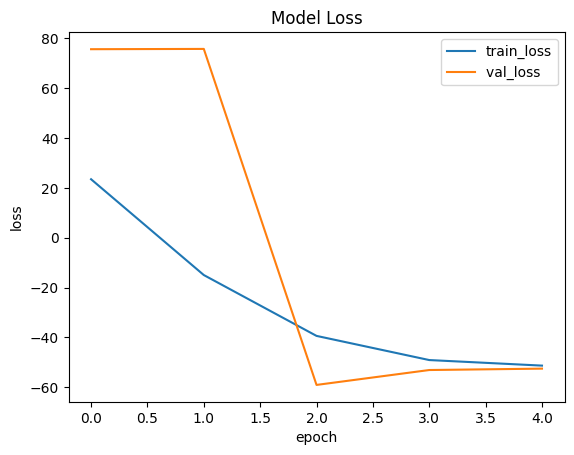

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss ' ])
plt.show()



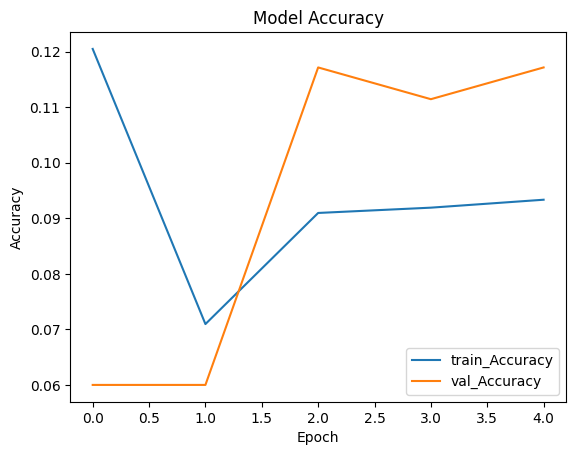

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_Accuracy','val_Accuracy' ])
plt.show()

In [35]:
#Model Evaluation and Testing

test_dataset

<_SkipDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [36]:
test_dataset=test_dataset.batch(1)
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 1s 693ms/step


1.4777899

In [37]:
#Loading and saving
lenet_model.save("lenet")

In [38]:
lenet_loaded_model=tf.keras.models.load_model("lenet")
lenet_loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 6)      

In [39]:
#Repredict

In [40]:
#Save in hdf5 version
lenet_loaded_model.save("lenet.hdf5")
lenet_loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 6)      

In [41]:
###Save only weights

lenet_model.save_weights("weights/lenet_weights")

In [42]:
#Load Weights
lenet_weights_model=lenet_model.load_weights("weights/lenet_weights")

Mounted at /content/Drive


In [44]:
!sudo chmod -R 755 /content/drive/MyDrive/


chmod: cannot access '/content/drive/MyDrive/': No such file or directory


In [45]:
!mkdir -p /content/drive/MyDrive/lenet_colab/

In [46]:
!cp -rv /content/lenet/ /content/drive/MyDrive/lenet_colab/

'/content/lenet/' -> '/content/drive/MyDrive/lenet_colab/lenet'
'/content/lenet/variables' -> '/content/drive/MyDrive/lenet_colab/lenet/variables'
'/content/lenet/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/lenet_colab/lenet/variables/variables.data-00000-of-00001'
'/content/lenet/variables/variables.index' -> '/content/drive/MyDrive/lenet_colab/lenet/variables/variables.index'
'/content/lenet/assets' -> '/content/drive/MyDrive/lenet_colab/lenet/assets'
'/content/lenet/fingerprint.pb' -> '/content/drive/MyDrive/lenet_colab/lenet/fingerprint.pb'
'/content/lenet/saved_model.pb' -> '/content/drive/MyDrive/lenet_colab/lenet/saved_model.pb'
'/content/lenet/keras_metadata.pb' -> '/content/drive/MyDrive/lenet_colab/lenet/keras_metadata.pb'


In [47]:
!cp -r /content/drive/MyDrive/lenet_colab/ /content/lenet_colab/

In [48]:
#saving to Google Drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [49]:
###############Functional API

In [50]:
from tensorflow.keras.models import Model

In [51]:
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name="Input Image")

x=Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu')(func_input)
x= BatchNormalization()(x)
x= MaxPool2D(pool_size=2,strides=2)(x)

x= Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='sigmoid')(x)
x=  BatchNormalization()(x)
x=  MaxPool2D(pool_size=2,strides=2)(x)

x=  Flatten()(x)

x=  Dense(100,activation="relu")(x)
x=  BatchNormalization()(x)
x=  Dense(10,activation="relu")(x)
x=  BatchNormalization()(x)
x=  Dense(1,activation="relu")(x)

func_output= Dense(1, activation="sigmoid")(x)

lenet_model_func= Model(func_input, func_output, name="Lenet Model")
lenet_model_func.summary()


Model: "Lenet Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     

In [52]:
#Feature Extractor
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name="Input Image")

x=Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu')(func_input)
x= BatchNormalization()(x)
x= MaxPool2D(pool_size=2,strides=2)(x)

x= Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu')(x)
x=  BatchNormalization()(x)
output=  MaxPool2D(pool_size=2,strides=2)(x)

feature_extractor_model= Model(func_input, output, name="Feature_Extractor")
feature_extractor_model.summary()


Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Batc  (None, 109, 109, 16

In [53]:
#feature_extractor_model+ Classification Layer
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name="Input Image")

x= feature_extractor_model(func_input)
x=  Flatten()(x)

x=  Dense(100,activation="relu")(x)
x=  BatchNormalization()(x)

x=  Dense(10,activation="relu")(x)
x=  BatchNormalization()(x)
x=  Dense(1,activation="relu")(x)

func_output= Dense(1, activation="sigmoid")(x)

lenet_model_func= Model(func_input, func_output, name="Lenet Model")
lenet_model_func.summary()


Model: "Lenet Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Function  (None, 54, 54, 16)       1136      
 al)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_7 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_10 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 10)                

In [54]:
# Feature Extractor Sequential Model
#1. Feature Extractor Layers
feature_extractor_seq_model=tf.keras.Sequential([
                    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

                    Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
                    BatchNormalization(),
                    MaxPool2D(pool_size=2,strides=2),

                    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
                    BatchNormalization(),
                    MaxPool2D(pool_size=2,strides=2),

])
feature_extractor_seq_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_12 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_13 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

In [55]:
#2. Classification Layer
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name="Input Image")

x= feature_extractor_seq_model(func_input)
x=  Flatten()(x)

x=  Dense(100,activation="relu")(x)
x=  BatchNormalization()(x)

x=  Dense(10,activation="relu")(x)
x=  BatchNormalization()(x)
x=  Dense(1,activation="relu")(x)

func_output= Dense(1, activation="sigmoid")(x)

lenet_model_func= Model(func_input, func_output, name="Lenet Model")
lenet_model_func.summary()


Model: "Lenet Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 54, 54, 16)        1136      
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_11 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_14 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                       